Titanic Project

Problem Statement:

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:

    https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [61]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since in "Embarked" there are only 2 null values it means that those are not sure where they embarked where as in "Cabin" the null values may tell us that either it is not known which cabin it is or there is no separate cabin alloted to them, hence we cannot delete rows of "Camin" null values.

In [66]:
df['Cabin']=df['Cabin'].where(~df['Cabin'].notna(),'Booked Cabin')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Booked Cabin,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Booked Cabin,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,Booked Cabin,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,Booked Cabin,C


In [67]:
df['Cabin']=df['Cabin'].replace(np.nan,'No Cabin')
df['Age']=df['Age'].replace(np.nan,np.mean(df['Age']))
df['Age']=df['Age'].astype(int)
df=df.dropna()

In [68]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [69]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Booked Cabin,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Booked Cabin,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,No Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,Booked Cabin,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,No Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,Booked Cabin,C


In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['Sex']=enc.fit_transform(df['Sex'].values.reshape(-1,1))
df['Embarked']=enc.fit_transform(df['Embarked'].values.reshape(-1,1))
df['Ticket']=enc.fit_transform(df['Ticket'].values.reshape(-1,1))
df['Cabin']=enc.fit_transform(df['Cabin'].values.reshape(-1,1))

In [71]:
df['Name']=enc.fit_transform(df['Name'].values.reshape(-1,1))
#df=df.drop(columns=['PassengerId','Name'])

In [72]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,444.000000,0.649044,29.498313,0.524184,0.382452,338.262092,32.096681,0.772778,1.535433
std,256.998173,0.486260,0.834700,256.776492,0.477538,12.979638,1.103705,0.806761,200.477425,49.697504,0.419273,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,222.000000,0.000000,22.000000,0.000000,0.000000,159.000000,7.895800,1.000000,1.000000
50%,446.000000,0.000000,3.000000,444.000000,1.000000,29.000000,0.000000,0.000000,336.000000,14.454200,1.000000,2.000000
75%,668.000000,1.000000,3.000000,666.000000,1.000000,35.000000,1.000000,0.000000,519.000000,31.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,888.000000,1.000000,80.000000,8.000000,6.000000,679.000000,512.329200,1.000000,2.000000


In [73]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22,1,0,522.0,7.2500,1.0,2.0
1,2,1,1,190.0,0.0,38,1,0,595.0,71.2833,0.0,0.0
2,3,1,3,353.0,0.0,26,0,0,668.0,7.9250,1.0,2.0
3,4,1,1,272.0,0.0,35,1,0,48.0,53.1000,0.0,2.0
4,5,0,3,15.0,1.0,35,0,0,471.0,8.0500,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547.0,1.0,27,0,0,100.0,13.0000,1.0,2.0
887,888,1,1,303.0,0.0,19,0,0,14.0,30.0000,0.0,2.0
888,889,0,3,412.0,0.0,29,1,2,674.0,23.4500,1.0,2.0
889,890,1,1,81.0,1.0,26,0,0,8.0,30.0000,0.0,0.0


In [74]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<AxesSubplot:>

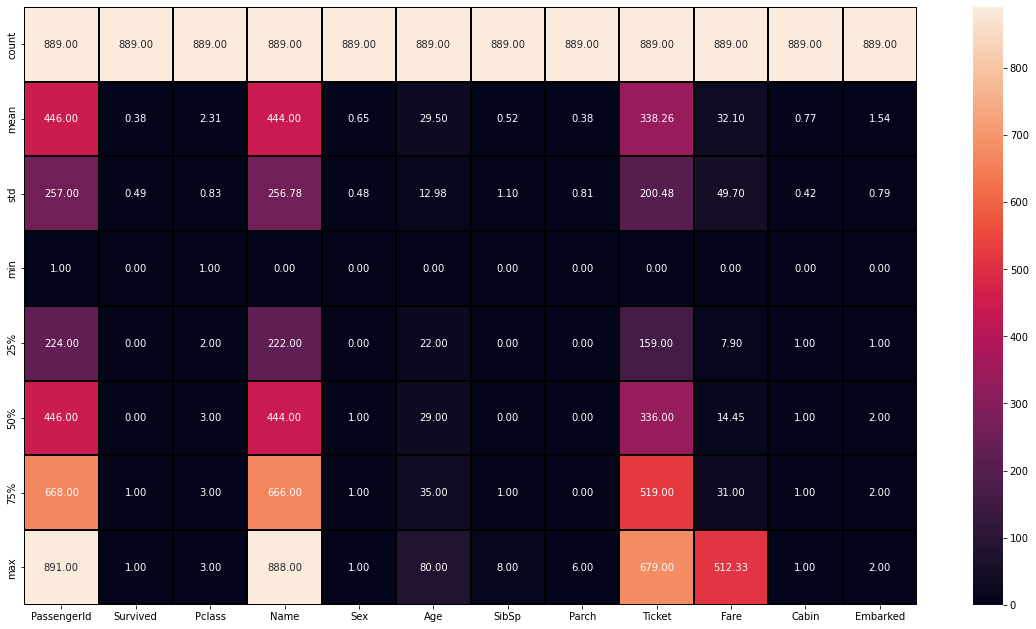

In [75]:
plt.figure(figsize=(20,11))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [76]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.041324,0.043136,0.030842,-0.057686,-0.001657,-0.056852,0.012703,-0.020045,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.059075,-0.541585,-0.072695,-0.034040,0.083151,-0.160931,0.255290,-0.313435,-0.169718
Pclass,-0.035330,-0.335549,1.000000,0.054837,0.127741,-0.331685,0.081656,0.016824,0.315959,-0.548193,0.723815,0.164681
Name,-0.041324,-0.059075,0.054837,1.000000,0.022087,0.050199,-0.016558,-0.048533,0.049406,-0.050396,0.036338,-0.006849
Sex,0.043136,-0.541585,0.127741,0.022087,1.000000,0.087839,-0.116348,-0.247508,0.055024,-0.179958,0.135589,0.110320
Age,0.030842,-0.072695,-0.331685,0.050199,0.087839,1.000000,-0.231992,-0.175770,-0.063881,0.090885,-0.231421,-0.025105
SibSp,-0.057686,-0.034040,0.081656,-0.016558,-0.116348,-0.231992,1.000000,0.414542,0.077995,0.160887,0.038657,0.068900
Parch,-0.001657,0.083151,0.016824,-0.048533,-0.247508,-0.175770,0.414542,1.000000,0.018409,0.217532,-0.039101,0.040449
Ticket,-0.056852,-0.160931,0.315959,0.049406,0.055024,-0.063881,0.077995,0.018409,1.000000,-0.010562,0.244330,0.000271
Fare,0.012703,0.255290,-0.548193,-0.050396,-0.179958,0.090885,0.160887,0.217532,-0.010562,1.000000,-0.480425,-0.226311


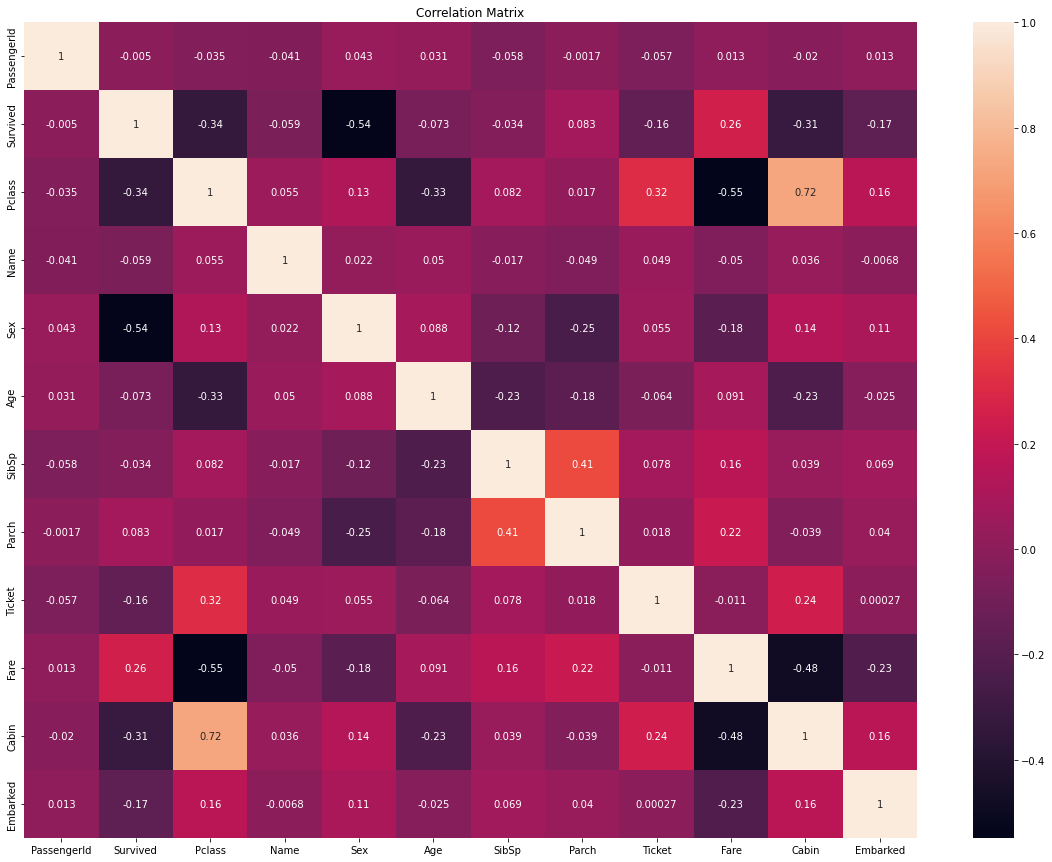

In [77]:
corr_mat=df.corr()
plt.figure(figsize=[20,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [78]:
df.corr()['Survived'].sort_values()

Sex           -0.541585
Pclass        -0.335549
Cabin         -0.313435
Embarked      -0.169718
Ticket        -0.160931
Age           -0.072695
Name          -0.059075
SibSp         -0.034040
PassengerId   -0.005028
Parch          0.083151
Fare           0.255290
Survived       1.000000
Name: Survived, dtype: float64

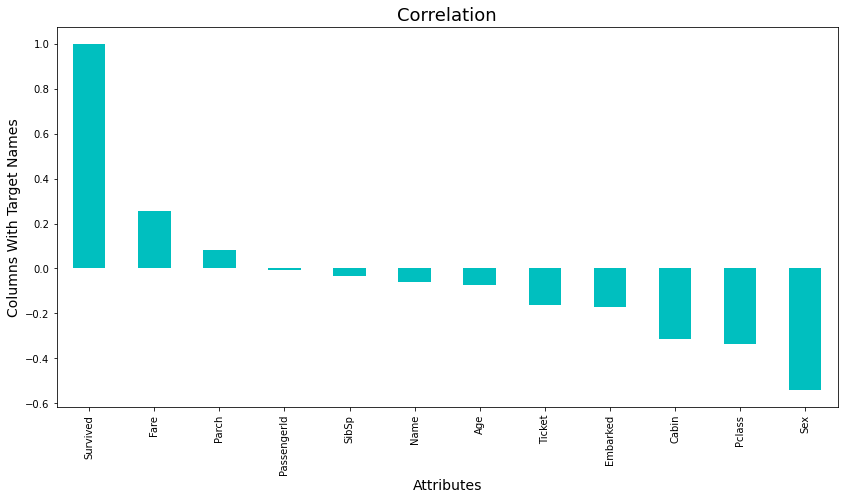

In [79]:
plt.figure(figsize=(14,7))
df.corr()['Survived'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

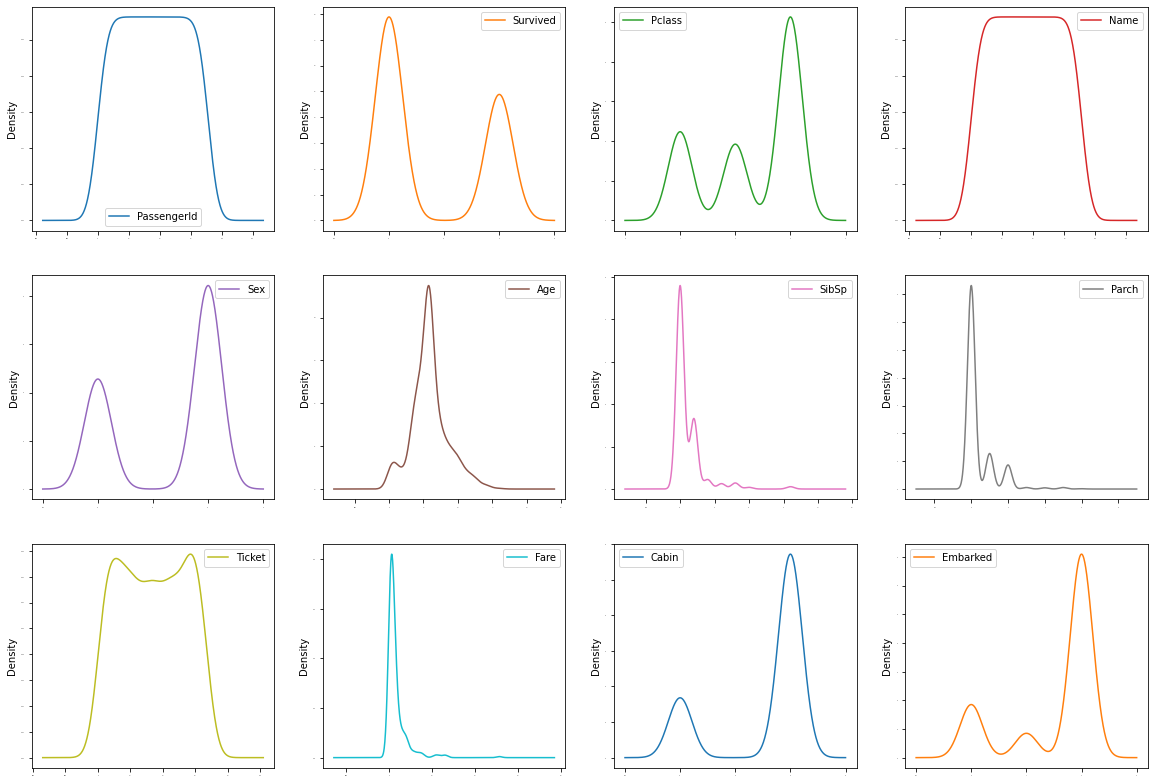

In [80]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(20,14))
plt.show()

# Outliers:

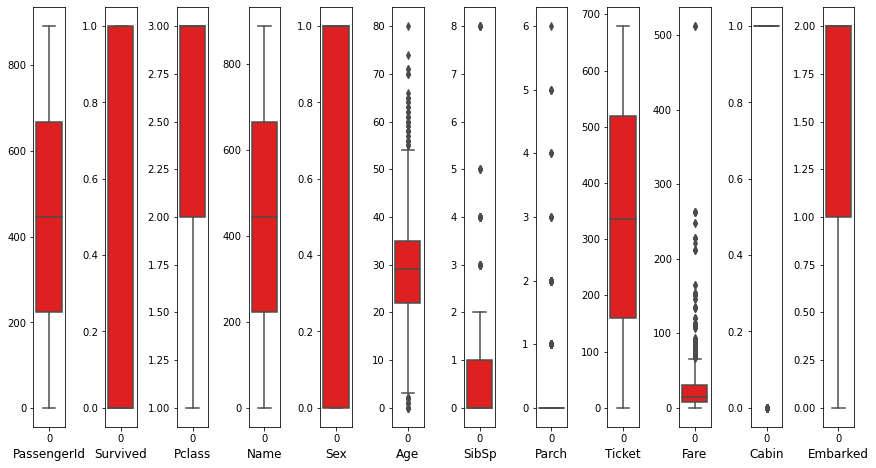

In [81]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='red',orient='v')
    plt.xlabel(collist[i],fontsize=12)
    plt.tight_layout()

In [82]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,:]))
z.shape

(889, 12)

In [83]:
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
        118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
        298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
        526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
        688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
        823, 844, 848, 849, 856, 861, 883], dtype=int64),
 array([7, 6, 7, 9, 6, 6, 6, 6, 7, 9, 5, 5, 9, 6, 6, 6, 7, 6, 6, 6, 6, 6,
        9, 6, 6, 6, 9, 9, 6, 9, 7, 9, 9, 6, 7, 7, 9, 6, 5, 9, 6, 6, 9, 7,
        7, 5, 7, 5, 7, 9, 6, 6, 9, 9, 9, 9, 7, 9, 9, 5, 7, 9, 6, 6, 6, 6,
        6, 6, 5, 7, 6, 7], dtype=int64))

In [84]:
len(np.where(z>3)[0])

72

In [85]:
df_new=df[(z<3).all(axis=1)]

In [86]:
x=df_new.drop(['Survived'],axis=1)
y=df_new['Survived']

In [87]:
x.skew()

PassengerId    0.003468
Pclass        -0.639191
Name           0.010237
Sex           -0.671699
Age            0.338520
SibSp          1.975774
Parch          2.118544
Ticket         0.037788
Fare           2.342849
Cabin         -1.336870
Embarked      -1.273629
dtype: float64

In [88]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [89]:
x.skew()

PassengerId   -0.279307
Pclass        -0.433034
Name          -0.272179
Sex           -0.671699
Age            0.074943
SibSp          0.945223
Parch          1.577668
Ticket        -0.292046
Fare          -0.019133
Cabin         -1.336870
Embarked      -1.070415
dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
LR=LogisticRegression()
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc," on Random State: ",maxRS)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Best accuracy:  0.8780487804878049  on Random State:  52
[[75 14]
 [16 59]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        89
           1       0.81      0.79      0.80        75

    accuracy                           0.82       164
   macro avg       0.82      0.81      0.82       164
weighted avg       0.82      0.82      0.82       164



In [91]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt.fit(x_train,y_train)
    preddt=dt.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Best accuracy:  83.53658536585365  on Random State:  144
[[75 14]
 [20 55]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.80      0.73      0.76        75

    accuracy                           0.79       164
   macro avg       0.79      0.79      0.79       164
weighted avg       0.79      0.79      0.79       164



In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Best accuracy:  90.85365853658537  on Random State:  35
[[83  6]
 [20 55]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        89
           1       0.90      0.73      0.81        75

    accuracy                           0.84       164
   macro avg       0.85      0.83      0.84       164
weighted avg       0.85      0.84      0.84       164



In [93]:
features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=35)

In [94]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred_test)*100)

Accuracy 86.58536585365853


# Cross Validation:

In [95]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.792174173275475


In [96]:
scr=cross_val_score(dt,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7507032769714199


In [97]:
scr=cross_val_score(rf,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8301062397127039


# Hyper-Tuning:

In [98]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [99]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
GCV.fit(features_train,target_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt'}

In [100]:
GCV_pred=GCV.best_estimator_.predict(features_test)
accuracy_score(target_test,GCV_pred)

0.9085365853658537

# AUC ROC Curve:

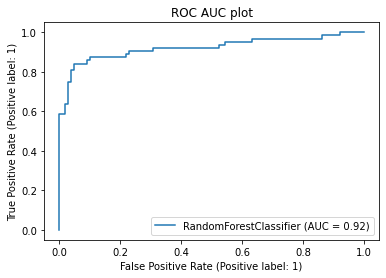

In [101]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,features_test,target_test)
plt.title('ROC AUC plot')
plt.show()

# Saving Model:

In [102]:
import joblib
joblib.dump(GCV.best_estimator_,'Titanic Model.pkl')

['Titanic Model.pkl']